Курсовой проект по курсу "Библиотеки Python для Data Science: продолжение"

Автор: Волков Андрей

##### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore')

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [3]:
TRAIN_PATH = '/Users/andrewvolkov/Documents/Study/ds_librarys/course_project/course_project_train.csv'
TEST_PATH = '/Users/andrewvolkov/Documents/Study/ds_librarys/course_project/course_project_test.csv'
PREP_DS_PATH = '/Users/andrewvolkov/Documents/Study/ds_librarys/course_project/prep_train'

SCALER_FILE_PATH = '/Users/andrewvolkov/Documents/Study/ds_librarys/course_project/scaler.pkl'

In [4]:
df_test = pd.read_csv(TEST_PATH)
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [5]:
df_train = pd.read_csv(TRAIN_PATH)
df_train

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.0,< 1 year,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1
7497,Rent,1878910.0,6 years,0.0,12.0,32.1,1778920.0,0.0,NaN,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0
7498,Home Mortgage,NaN,NaN,0.0,21.0,26.5,1141250.0,0.0,NaN,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,NaN,0


In [6]:
df_train.shape

(7500, 17)

In [7]:
df_test.shape

(2500, 16)

### Анализ и обработка df_train

In [8]:
df_train.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

### Поиск и обработка выборосов

In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,5943.0,1.366392e+06,8.453392e+05,164597.0,844341.0,1168386.0,1640137.00,1.014934e+07
Tax Liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.0,0.0,0.00,7.000000e+00
Number of Open Accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.0,10.0,14.00,4.300000e+01
Years of Credit History,7500.0,1.831747e+01,7.041946e+00,4.0,13.5,17.0,21.80,5.770000e+01
Maximum Open Credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.5,478159.0,793501.50,1.304726e+09
Number of Credit Problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.0,0.0,0.00,7.000000e+00
Months since last delinquent,3419.0,3.469260e+01,2.168881e+01,0.0,16.0,32.0,50.00,1.180000e+02
Bankruptcies,7486.0,1.171520e-01,3.471917e-01,0.0,0.0,0.0,0.00,4.000000e+00
Current Loan Amount,7500.0,1.187318e+07,3.192612e+07,11242.0,180169.0,309573.0,519882.00,1.000000e+08
Current Credit Balance,7500.0,2.898332e+05,3.178714e+05,0.0,114256.5,209323.0,360406.25,6.506797e+06


##### Months since last delinquet

In [10]:
df_train['Months since last delinquent'].describe()


count    3419.000000
mean       34.692600
std        21.688806
min         0.000000
25%        16.000000
50%        32.000000
75%        50.000000
max       118.000000
Name: Months since last delinquent, dtype: float64

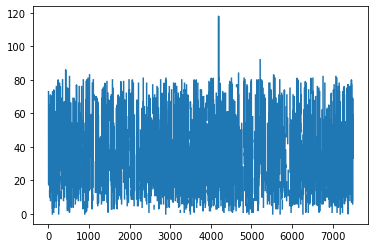

In [11]:
plt.plot(df_train['Months since last delinquent'])

In [12]:
df_train['Months since last delinquent'].median()

32.0

In [13]:
df_train.loc[df_train['Months since last delinquent'] > 80, 'Months since last delinquent'] = df_train['Months since last delinquent'].median()

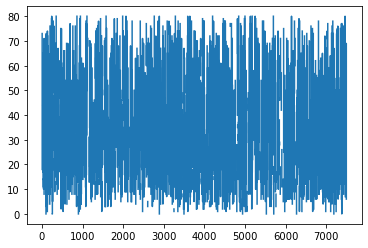

In [14]:
plt.plot(df_train['Months since last delinquent'])

##### Current Credit Balance

In [15]:
df_train['Current Credit Balance'].describe()

count    7.500000e+03
mean     2.898332e+05
std      3.178714e+05
min      0.000000e+00
25%      1.142565e+05
50%      2.093230e+05
75%      3.604062e+05
max      6.506797e+06
Name: Current Credit Balance, dtype: float64

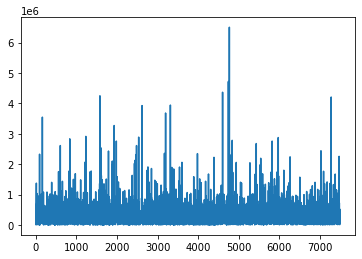

In [16]:
plt.plot(df_train['Current Credit Balance'])

In [17]:
df_train['Current Credit Balance'].std()

317871.3823802766

In [18]:
df_train.loc[df_train['Current Credit Balance'] > 4e6, 'Current Credit Balance'] = df_train['Current Credit Balance'].mean()

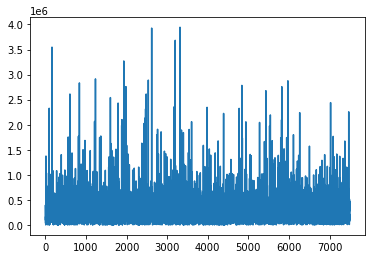

In [19]:
plt.plot(df_train['Current Credit Balance'])

##### Monthly Debt

In [20]:
df_train['Monthly Debt'].describe()

count      7500.000000
mean      18314.454133
std       11926.764673
min           0.000000
25%       10067.500000
50%       16076.500000
75%       23818.000000
max      136679.000000
Name: Monthly Debt, dtype: float64

In [21]:
df_train.loc[df_train['Monthly Debt'] > 100000] 

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
1615,Own Home,6651900.0,10+ years,0.0,13.0,25.1,2155868.0,0.0,NaN,0.0,debt consolidation,Long Term,314380.0,1.623569e+06,110311.0,719.0,0
2535,Home Mortgage,4120226.0,10+ years,0.0,15.0,13.0,3931620.0,0.0,NaN,0.0,debt consolidation,Long Term,542146.0,2.889577e+06,104036.0,656.0,1
4745,Own Home,6029954.0,4 years,0.0,30.0,17.5,11603856.0,0.0,NaN,0.0,debt consolidation,Short Term,753588.0,2.898332e+05,136679.0,745.0,0
6946,Own Home,6492395.0,1 year,0.0,19.0,26.0,1406526.0,0.0,NaN,0.0,other,Short Term,322190.0,1.169773e+06,100091.0,707.0,0


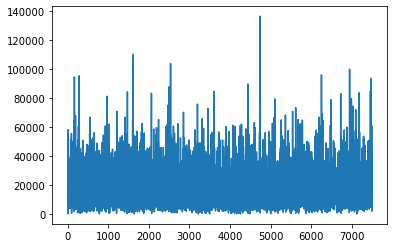

In [22]:
plt.plot(df_train['Monthly Debt'])

In [23]:
df_train.loc[df_train['Monthly Debt'] > 100000, 'Monthly Debt'] = df_train['Monthly Debt'].mean() 

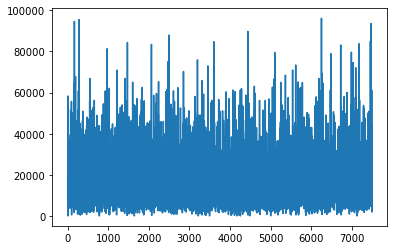

In [24]:
plt.plot(df_train['Monthly Debt'])

### Обработка пропусков

In [25]:
# пропуски
len(df_train) - df_train.count()

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

##### Annual Income

In [26]:
df_train['Annual Income'].isna().value_counts()

False    5943
True     1557
Name: Annual Income, dtype: int64

In [27]:
df_train['Annual Income'].describe()

count    5.943000e+03
mean     1.366392e+06
std      8.453392e+05
min      1.645970e+05
25%      8.443410e+05
50%      1.168386e+06
75%      1.640137e+06
max      1.014934e+07
Name: Annual Income, dtype: float64

In [28]:
df_train['Annual Income'].median()

1168386.0

In [29]:
df_train.loc[df_train['Annual Income'].isna(), 'Annual Income'] = df_train['Annual Income'].median()

##### Months since last delinquent

In [30]:
df_train['Months since last delinquent'].describe()

count    3419.000000
mean       34.226089
std        21.172259
min         0.000000
25%        16.000000
50%        32.000000
75%        49.000000
max        80.000000
Name: Months since last delinquent, dtype: float64

In [31]:
df_train['Months since last delinquent'].median()

32.0

In [32]:
df_train.loc[df_train['Months since last delinquent'].isna(), 'Months since last delinquent'] = df_train['Months since last delinquent'].median()

##### Bankruptcies

In [33]:
df_train.loc[df_train['Bankruptcies'].isna(), 'Bankruptcies'] = 0.0

##### Credit Score

In [34]:
df_train['Credit Score'].describe()

count    5943.000000
mean     1151.087498
std      1604.451418
min       585.000000
25%       711.000000
50%       731.000000
75%       743.000000
max      7510.000000
Name: Credit Score, dtype: float64

In [35]:
df_train['Credit Score'].median()

731.0

In [36]:
df_train.loc[df_train['Credit Score'].isna(), 'Credit Score'] = df_train['Credit Score'].median()

In [37]:
len(df_train) - df_train.count()

Home Ownership                    0
Annual Income                     0
Years in current job            371
Tax Liens                         0
Number of Open Accounts           0
Years of Credit History           0
Maximum Open Credit               0
Number of Credit Problems         0
Months since last delinquent      0
Bankruptcies                      0
Purpose                           0
Term                              0
Current Loan Amount               0
Current Credit Balance            0
Monthly Debt                      0
Credit Score                      0
Credit Default                    0
dtype: int64

Так как Years in current job категориальный признак, то его заполним после обработки

### Обработка категориальных признаков

In [38]:
df_train.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

##### Home Ownership

In [39]:
df_train['Home Ownership'].unique()

array(['Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'], dtype=object)

In [40]:
df_train['Home Ownership'] = df_train['Home Ownership'].replace({'Own Home':0,
                                                                 'Home Mortgage':1,
                                                                 'Rent':2,
                                                                'Have Mortgage':3})

##### Years in curreny job

In [41]:
df_train['Years in current job'].unique()

array([nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

In [42]:
df_train['Years in current job'] = df_train['Years in current job'].replace({'10+ years':10,
                                                                             '9 years':9,
                                                                             '8 years':8,
                                                                             '6 years':7,
                                                                             '7 years':6,
                                                                             '5 years':6,
                                                                             '4 years':5,
                                                                             '3 years':4,
                                                                             '2 years':2,
                                                                             '1 year':1,
                                                                             '< 1 year':0})

заполним пропуски

In [43]:
df_train['Years in current job'].describe()

count    7129.000000
mean        6.109693
std         3.522340
min         0.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        10.000000
Name: Years in current job, dtype: float64

In [44]:
df_train['Years in current job'].median()

6.0

In [45]:
df_train.loc[df_train['Years in current job'].isna(), 'Years in current job'] = df_train['Years in current job'].median()

In [46]:
# еще раз проверим пропуски
len(df_train) - df_train.count()

Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Credit Default                  0
dtype: int64

##### Purpose

In [47]:
df_train['Purpose'].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

In [48]:
df_train['Purpose'] = df_train['Purpose'].replace({'debt consolidation':0,
                                                   'other':1,
                                                   'home improvements':2,
                                                   'take a trip':3,
                                                   'buy a car':4,
                                                   'small business':5,
                                                   'business loan':6,
                                                   'wedding':7,
                                                   'educational expenses':8,
                                                   'buy house':9,
                                                   'medical bills':10,
                                                   'moving':11,
                                                   'major purchase':12,
                                                   'vacation':13,
                                                   'renewable energy':14})

##### Term

In [49]:
df_train['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [50]:
df_train['Term'] = df_train['Term'].replace({'Short Term':0,
                                            'Long Term':1})

In [51]:
df_train.dtypes

Home Ownership                    int64
Annual Income                   float64
Years in current job            float64
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                           int64
Term                              int64
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

In [52]:
df_train.to_csv(PREP_DS_PATH, index=False, encoding='utf-8')

### Анализ данных и отбор признаков

In [53]:
TARGET_NAME = 'Credit Default'
FEATURE_NAMES = df_train.columns.drop(TARGET_NAME).tolist()

In [54]:
FEATURE_NAMES

['Home Ownership',
 'Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Purpose',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score']

In [55]:
df_train[TARGET_NAME].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

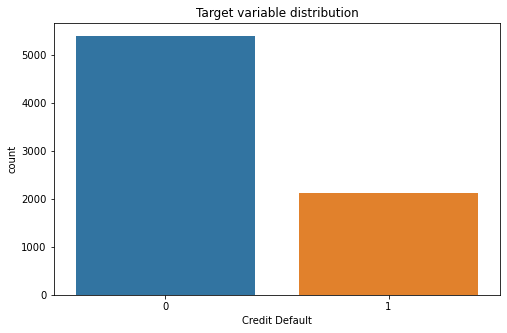

In [56]:
plt.figure(figsize=(8, 5))

sns.countplot(x=TARGET_NAME, data=df_train)

plt.title('Target variable distribution')
plt.show()

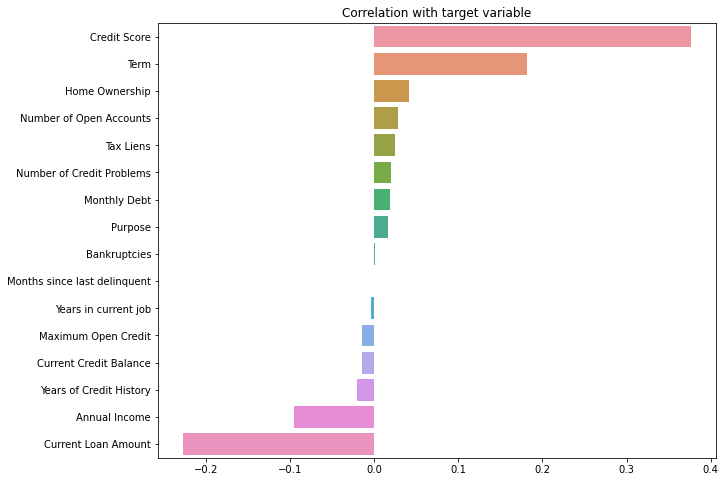

In [57]:
corr_with_target = df_train[FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

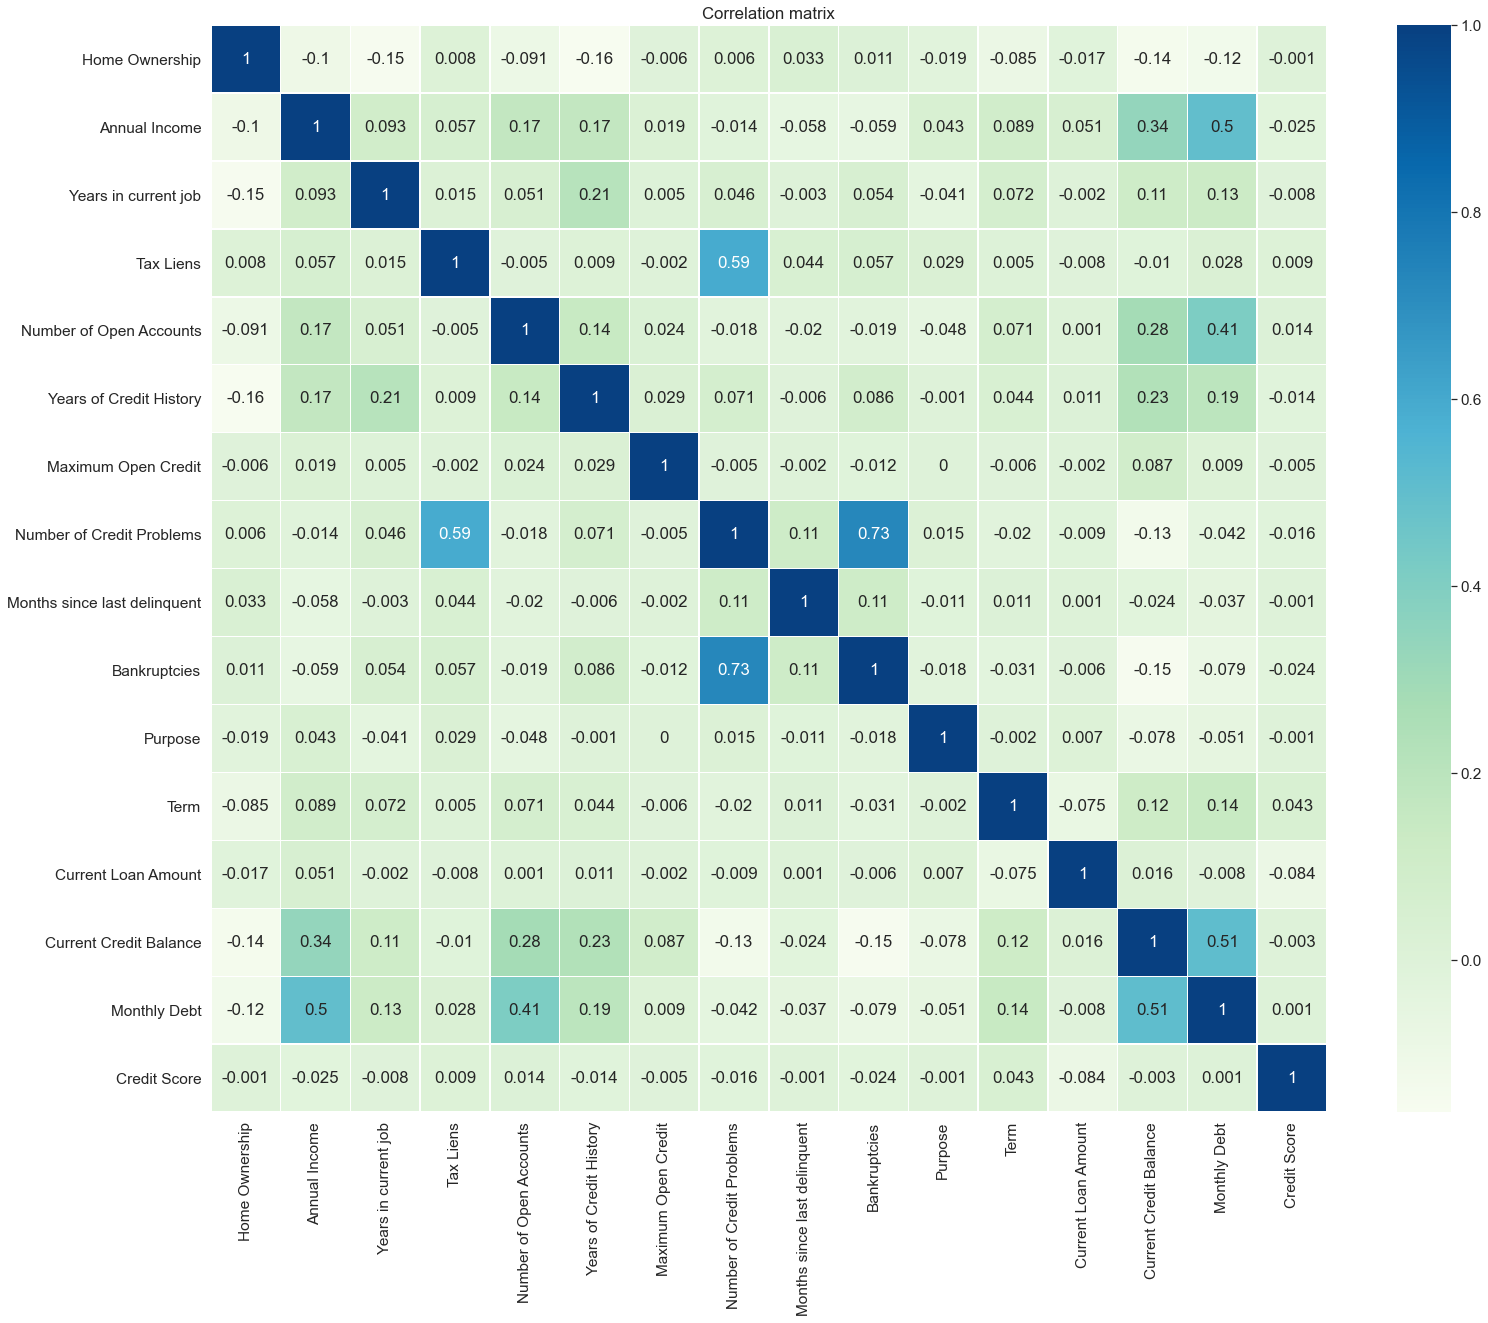

In [58]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df_train[FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

Как видно из матрицы корреляций, между собой коррелируют признаки банкротства и количества кредитных проблем. Но не достаточно для того, что бы объеденить их в один признак

In [59]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgbm
import catboost as catb

import pickle
import random


In [60]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [61]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [62]:
NUM_FEATURE_NAMES = ['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score']

CAT_FEATURE_NAMES = ['Term', 'Purpose', 'Home Ownership', 'Years in current job']
ALL_FEATURES = NUM_FEATURE_NAMES + CAT_FEATURE_NAMES

In [63]:
for colname in CAT_FEATURE_NAMES:
    df_train[colname] = pd.Categorical(df_train[colname])
    
df_train[CAT_FEATURE_NAMES].dtypes

Term                    category
Purpose                 category
Home Ownership          category
Years in current job    category
dtype: object

In [64]:
scaler = StandardScaler()

df_norm = df_train.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])

df_train = df_norm.copy()

Сохраним скейлер

In [65]:
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

Разбиение на трейн и валидационный

In [66]:
X = df_train[NUM_FEATURE_NAMES]
y = df_train[TARGET_NAME]

X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)

Балансировка целевой переменной

In [67]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    3771
1    2958
Name: Credit Default, dtype: int64

In [68]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

Логистическая регрессия

In [69]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_val)

get_classification_report(y_train, y_train_pred, y_val, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.64      0.89      0.74      3771
           1       0.72      0.36      0.48      2958

    accuracy                           0.66      6729
   macro avg       0.68      0.63      0.61      6729
weighted avg       0.68      0.66      0.63      6729

TEST

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1616
           1       0.52      0.33      0.41       634

    accuracy                           0.73      2250
   macro avg       0.65      0.61      0.61      2250
weighted avg       0.70      0.73      0.70      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1423  193
1                423  211


k ближайших соседей

In [70]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_val)

get_classification_report(y_train, y_train_pred, y_val, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      3771
           1       0.78      0.69      0.73      2958

    accuracy                           0.78      6729
   macro avg       0.78      0.77      0.77      6729
weighted avg       0.78      0.78      0.77      6729

TEST

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1616
           1       0.40      0.44      0.42       634

    accuracy                           0.66      2250
   macro avg       0.59      0.59      0.59      2250
weighted avg       0.67      0.66      0.66      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1204  412
1                357  277


XGBoost

In [71]:
model_xgb = xgb.XGBClassifier(random_state=21)
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_val)

get_classification_report(y_train, y_train_pred, y_val, y_test_pred)

[20:47:03] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TRAIN

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3771
           1       0.97      0.97      0.97      2958

    accuracy                           0.97      6729
   macro avg       0.97      0.97      0.97      6729
weighted avg       0.97      0.97      0.97      6729

TEST

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1616
           1       0.50      0.43      0.46       634

    accuracy                           0.72      2250
   macro avg       0.65      0.63      0.64      2250
weighted avg       0.71      0.72      0.71      2250

CONFUSION MATRIX

col_0              0    1
Credit 

LightGBM

In [72]:
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_val)

get_classification_report(y_train, y_train_pred, y_val, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3771
           1       0.95      0.89      0.92      2958

    accuracy                           0.93      6729
   macro avg       0.93      0.93      0.93      6729
weighted avg       0.93      0.93      0.93      6729

TEST

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1616
           1       0.51      0.46      0.48       634

    accuracy                           0.72      2250
   macro avg       0.65      0.64      0.65      2250
weighted avg       0.71      0.72      0.72      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1335  281
1                344  290


CatBoost

In [73]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_val)

get_classification_report(y_train, y_train_pred, y_val, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      3771
           1       0.93      0.84      0.89      2958

    accuracy                           0.90      6729
   macro avg       0.91      0.90      0.90      6729
weighted avg       0.91      0.90      0.90      6729

TEST

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1616
           1       0.54      0.44      0.49       634

    accuracy                           0.74      2250
   macro avg       0.67      0.65      0.66      2250
weighted avg       0.72      0.74      0.73      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1381  235
1                355  279


##### Вернем котегориальные признаки для catboost

Конвертируем их в str для catboost

In [74]:
df_train[CAT_FEATURE_NAMES] = df_train[CAT_FEATURE_NAMES].astype(str)

In [75]:
X = df_train[ALL_FEATURES]
y = df_train[TARGET_NAME]

X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)

In [76]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    3771
1    2958
Name: Credit Default, dtype: int64

In [77]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

In [78]:
model_catb = catb.CatBoostClassifier(silent=True,
                                     random_state=21,
                                     cat_features=['Term', 'Purpose', 'Home Ownership', 'Years in current job'])
model_catb.fit(X_train, y_train, plot=True)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_val)

get_classification_report(y_train, y_train_pred, y_val, y_test_pred)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

TRAIN

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      3771
           1       0.92      0.82      0.87      2958

    accuracy                           0.89      6729
   macro avg       0.89      0.88      0.89      6729
weighted avg       0.89      0.89      0.89      6729

TEST

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1616
           1       0.55      0.49      0.52       634

    accuracy                           0.75      2250
   macro avg       0.68      0.67      0.67      2250
weighted avg       0.74      0.75      0.74      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1367  249
1                324  310


In [79]:
model_catb = catb.CatBoostClassifier(class_weights=[1, 3.5], silent=True, random_state=21)

In [80]:
params = {'n_estimators':[50, 100, 200, 500, 700, 1000, 1200, 1500, 2000],
          'max_depth':[3, 5, 7]}

In [81]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [82]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X, y)

CPU times: user 22.1 s, sys: 1.04 s, total: 23.1 s
Wall time: 1min 33s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x7fa2b2cb0be0>,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200, 500, 700,
                                                         1000, 1200, 1500,
                                                         2000]},
                   scoring='f1')

In [83]:
rs.best_params_

{'n_estimators': 2000, 'max_depth': 5}

In [84]:
rs.best_score_

0.5442770357165855

##### Обучим модель с лучшими параметрами.

In [85]:
%%time

final_model = catb.CatBoostClassifier(class_weights=[1, 3.5],
                                      n_estimators=1200,
                                      max_depth=5,
                                      silent=True,
                                      cat_features=['Term', 'Purpose', 'Home Ownership', 'Years in current job'])
final_model.fit(X_train, y_train, plot=True)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_val)

get_classification_report(y_train, y_train_pred, y_val, y_test_pred)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

TRAIN

              precision    recall  f1-score   support

           0       1.00      0.43      0.60      3771
           1       0.58      1.00      0.73      2958

    accuracy                           0.68      6729
   macro avg       0.79      0.71      0.67      6729
weighted avg       0.81      0.68      0.66      6729

TEST

              precision    recall  f1-score   support

           0       0.90      0.36      0.52      1616
           1       0.36      0.90      0.51       634

    accuracy                           0.51      2250
   macro avg       0.63      0.63      0.51      2250
weighted avg       0.75      0.51      0.51      2250

CONFUSION MATRIX

col_0             0     1
Credit Default           
0               584  1032
1                62   572
CPU times: user 29.4 s, sys: 2.31 s, total: 31.7 s
Wall time: 14 s


### Работа с тестовыми данными

In [86]:
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [87]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income,1987.0,1.366922e+06,9.171252e+05,106533.0,852311.50,1178475.0,1629734.5,14975610.0
Tax Liens,2500.0,3.520000e-02,3.862909e-01,0.0,0.00,0.0,0.0,15.0
Number of Open Accounts,2500.0,1.118440e+01,4.852774e+00,1.0,8.00,10.0,14.0,48.0
Years of Credit History,2500.0,1.832592e+01,7.254659e+00,3.9,13.40,17.0,22.1,53.4
Maximum Open Credit,2500.0,7.105704e+05,1.511983e+06,0.0,278586.00,478676.0,802598.5,54484386.0
Number of Credit Problems,2500.0,1.620000e-01,5.598941e-01,0.0,0.00,0.0,0.0,15.0
Months since last delinquent,1142.0,3.418126e+01,2.202428e+01,0.0,16.00,30.0,50.0,82.0
Bankruptcies,2497.0,1.069283e-01,3.571893e-01,0.0,0.00,0.0,0.0,5.0
Current Loan Amount,2500.0,1.215572e+07,3.226097e+07,15422.0,187126.50,322366.0,522582.5,99999999.0
Current Credit Balance,2500.0,2.963966e+05,3.783020e+05,0.0,110114.50,207385.0,366348.5,6030087.0


##### Проверка тех же признаков на выборосы

##### Months since last delinquet

In [88]:
df_test['Months since last delinquent'].describe()


count    1142.000000
mean       34.181261
std        22.024277
min         0.000000
25%        16.000000
50%        30.000000
75%        50.000000
max        82.000000
Name: Months since last delinquent, dtype: float64

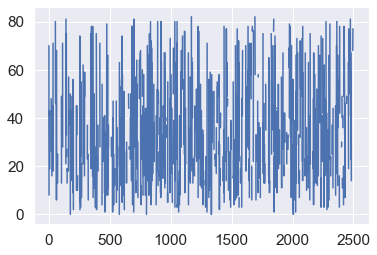

In [89]:
plt.plot(df_test['Months since last delinquent'])

##### Current Credit Balance

In [90]:
df_test['Current Credit Balance'].describe()

count    2.500000e+03
mean     2.963966e+05
std      3.783020e+05
min      0.000000e+00
25%      1.101145e+05
50%      2.073850e+05
75%      3.663485e+05
max      6.030087e+06
Name: Current Credit Balance, dtype: float64

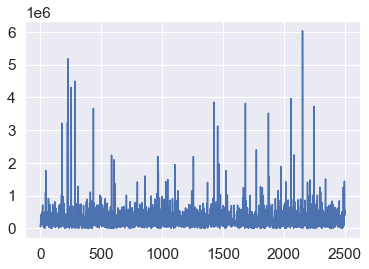

In [91]:
plt.plot(df_test['Current Credit Balance'])

In [92]:
df_test['Current Credit Balance'].std()

378301.96624212305

In [93]:
df_test.loc[df_test['Current Credit Balance'] > 4e6, 'Current Credit Balance'] = df_test['Current Credit Balance'].mean()

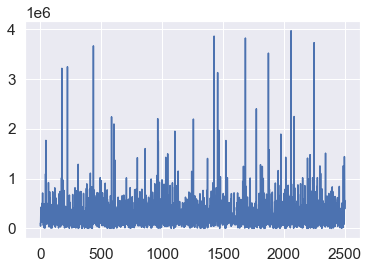

In [94]:
plt.plot(df_test['Current Credit Balance'])

##### Monthly Debt

In [95]:
df_test['Monthly Debt'].describe()

count     2500.000000
mean     18271.340000
std      11543.881469
min         93.000000
25%      10024.750000
50%      16642.500000
75%      24146.000000
max      93555.000000
Name: Monthly Debt, dtype: float64

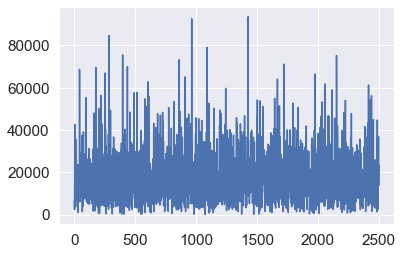

In [96]:
plt.plot(df_test['Monthly Debt'])

In [97]:
df_test.loc[df_test['Monthly Debt'] > 100000, 'Monthly Debt'] = df_test['Monthly Debt'].mean() 

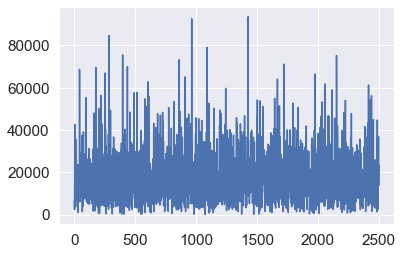

In [98]:
plt.plot(df_test['Monthly Debt'])

### Обработка пропусков

In [99]:
# пропуски
len(df_test) - df_test.count()

Home Ownership                     0
Annual Income                    513
Years in current job              86
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    1358
Bankruptcies                       3
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                     513
dtype: int64

##### Annual Income

In [100]:
df_test['Annual Income'].isna().value_counts()

False    1987
True      513
Name: Annual Income, dtype: int64

In [101]:
df_test['Annual Income'].describe()

count    1.987000e+03
mean     1.366922e+06
std      9.171252e+05
min      1.065330e+05
25%      8.523115e+05
50%      1.178475e+06
75%      1.629734e+06
max      1.497561e+07
Name: Annual Income, dtype: float64

In [102]:
df_test['Annual Income'].median()

1178475.0

In [103]:
df_test.loc[df_test['Annual Income'].isna(), 'Annual Income'] = df_test['Annual Income'].median()

##### Months since last delinquent

In [104]:
df_test['Months since last delinquent'].describe()

count    1142.000000
mean       34.181261
std        22.024277
min         0.000000
25%        16.000000
50%        30.000000
75%        50.000000
max        82.000000
Name: Months since last delinquent, dtype: float64

In [105]:
df_test['Months since last delinquent'].median()

30.0

In [106]:
df_test.loc[df_test['Months since last delinquent'].isna(), 'Months since last delinquent'] = df_test['Months since last delinquent'].median()

##### Credit Score

In [107]:
df_test['Credit Score'].describe()

count    1987.000000
mean     1234.516860
std      1740.219442
min       585.000000
25%       710.000000
50%       731.000000
75%       743.000000
max      7480.000000
Name: Credit Score, dtype: float64

In [108]:
df_test['Credit Score'].median()

731.0

In [109]:
df_test.loc[df_test['Credit Score'].isna(), 'Credit Score'] = df_test['Credit Score'].median()

In [110]:
len(df_test) - df_test.count()

Home Ownership                   0
Annual Income                    0
Years in current job            86
Tax Liens                        0
Number of Open Accounts          0
Years of Credit History          0
Maximum Open Credit              0
Number of Credit Problems        0
Months since last delinquent     0
Bankruptcies                     3
Purpose                          0
Term                             0
Current Loan Amount              0
Current Credit Balance           0
Monthly Debt                     0
Credit Score                     0
dtype: int64

Так как Years in current job категориальный признак, то его заполним после обработки

### Обработка категориальных признаков

In [111]:
df_test.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
dtype: object

##### Home Ownership

In [112]:
df_test['Home Ownership'].unique()

array(['Rent', 'Home Mortgage', 'Own Home', 'Have Mortgage'], dtype=object)

In [113]:
df_test['Home Ownership'] = df_test['Home Ownership'].replace({'Own Home':0,
                                                                 'Home Mortgage':1,
                                                                 'Rent':2,
                                                                'Have Mortgage':3})

##### Years in curreny job

In [114]:
df_test['Years in current job'].unique()

array(['4 years', '1 year', '3 years', '10+ years', '6 years', '5 years',
       '< 1 year', '2 years', '9 years', '8 years', '7 years', nan],
      dtype=object)

In [115]:
df_test['Years in current job'] = df_test['Years in current job'].replace({'10+ years':10,
                                                                             '9 years':9,
                                                                             '8 years':8,
                                                                             '6 years':7,
                                                                             '7 years':6,
                                                                             '5 years':6,
                                                                             '4 years':5,
                                                                             '3 years':4,
                                                                             '2 years':2,
                                                                             '1 year':1,
                                                                             '< 1 year':0})

заполним пропуски

In [116]:
df_test['Years in current job'].describe()

count    2414.000000
mean        6.176056
std         3.530354
min         0.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        10.000000
Name: Years in current job, dtype: float64

In [117]:
df_test['Years in current job'].median()

6.0

In [118]:
df_test.loc[df_test['Years in current job'].isna(), 'Years in current job'] = df_test['Years in current job'].median()

In [119]:
# еще раз проверим пропуски
len(df_test) - df_test.count()

Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    3
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
dtype: int64

##### Purpose

In [120]:
df_test['Purpose'].unique()

array(['debt consolidation', 'educational expenses', 'home improvements',
       'major purchase', 'other', 'buy a car', 'medical bills',
       'buy house', 'business loan', 'take a trip', 'small business',
       'moving', 'vacation', 'wedding'], dtype=object)

In [121]:
df_test['Purpose'] = df_test['Purpose'].replace({'debt consolidation':0,
                                                   'other':1,
                                                   'home improvements':2,
                                                   'take a trip':3,
                                                   'buy a car':4,
                                                   'small business':5,
                                                   'business loan':6,
                                                   'wedding':7,
                                                   'educational expenses':8,
                                                   'buy house':9,
                                                   'medical bills':10,
                                                   'moving':11,
                                                   'major purchase':12,
                                                   'vacation':13,
                                                   'renewable energy':14})

##### Term

In [122]:
df_test['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [123]:
df_test['Term'] = df_test['Term'].replace({'Short Term':0,
                                            'Long Term':1})

In [124]:
df_train.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

In [125]:
df_test[CAT_FEATURE_NAMES] = df_test[CAT_FEATURE_NAMES].astype(str)

In [126]:
for colname in CAT_FEATURE_NAMES:
    df_test[colname] = pd.Categorical(df_test[colname])
    
df_test[CAT_FEATURE_NAMES].dtypes

Term                    category
Purpose                 category
Home Ownership          category
Years in current job    category
dtype: object

In [127]:
df_norm = df_test.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])

df_test = df_norm.copy()

In [128]:
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,2,-0.182442,5.0,-0.091141,-0.450224,-0.803220,-0.323879,-0.289398,2.535260,-0.29942,0,0,-0.371832,-0.559686,-0.992788,-0.255828
1,2,-1.335526,1.0,-0.091141,-1.068551,1.981755,-0.433044,-0.289398,-1.591443,-0.29942,8,0,-0.374441,-0.742823,-1.382250,-0.276284
2,1,-0.214033,4.0,-0.091141,-0.244115,-0.637776,-0.334707,-0.289398,-0.127129,-0.29942,0,0,-0.370663,-0.435540,0.039653,3.917884
3,1,-0.131479,10.0,-0.091141,0.992538,-0.182805,-0.168202,-0.289398,2.535260,-0.29942,0,0,-0.370129,-0.231479,0.804714,-0.250714
4,1,1.233554,7.0,-0.091141,-0.038006,0.727138,0.328576,-0.289398,-0.127129,-0.29942,0,1,-0.352759,0.417610,2.108349,-0.271809


### Обучение модели на всех тренировочных данных.

In [129]:
X_train_final = df_train.drop(columns=TARGET_NAME)
y_train_final = df_train[TARGET_NAME]

In [130]:
df_for_balancing = pd.concat([X_train_final, y_train_final], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    5387
1    4226
Name: Credit Default, dtype: int64

In [131]:
X_train_final = df_balanced.drop(columns=TARGET_NAME)
y_train_final = df_balanced[TARGET_NAME]

In [132]:
final_model.fit(X_train_final, y_train_final, plot=True)

y_test_pred = final_model.predict(df_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [133]:
y_test_pred

array([0, 0, 1, ..., 0, 0, 1])

In [134]:
prediction_df = pd.DataFrame(y_test_pred)

In [135]:
prediction_df['Id'] = prediction_df.index

In [136]:
prediction_df

,0,Id
0,0,0
1,0,1
2,1,2
3,0,3
4,0,4
...,...,...
2495,0,2495
2496,0,2496
2497,0,2497
2498,0,2498


In [137]:
prediction_df = prediction_df.reindex(columns=['Id', 0])

In [138]:
prediction_df = prediction_df.rename(columns={0:'Credit Default'})

In [139]:
TEST_PRED_PATH = '/Users/andrewvolkov/Documents/Study/ds_librarys/course_project/AAVolkov_prediction.csv'

In [140]:
prediction_df.to_csv(TEST_PRED_PATH, index=False)

In [141]:
prediction_df

,Id,Credit Default
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
2495,2495,0
2496,2496,0
2497,2497,0
2498,2498,0
